# Challenges of the day:

# - Plot a bar graph to show the rating distribution. Means that, a bar chart shows how many business are rated as 1 star, 1.5 stars and so on

# - Find a way to find the unique categories, and plot a bar chart to show 20 most popular categories

# - Plot a bar chart to show top 20 cities that have the most number businesses

# - Select 1 city of your choice, then:

# -filter out all businesses in that city

# -find the 5 most popular business categories.

# -plot a bar chart to show the amount of checkins by hours of each business in the top 5 above ( meaning, x-axis is the hours, and y-axis is the amount of checkins)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np


In [2]:
business_df =pd.read_csv('yelp_business.csv')
checkin_df=pd.read_csv('yelp_checkin.csv')
checkin_df['hour']=pd.to_datetime(checkin_df['hour'],infer_datetime_format=True)
business_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [3]:
business_df

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",NaN,"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods
8,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,15,1,Coffee & Tea;Ice Cream & Frozen Yogurt;Food
9,TGWhGNusxyMaA4kQVBNeew,"""Detailing Gone Mobile""",NaN,"""""",Henderson,NV,89014,36.055825,-115.046350,5.0,7,1,Automotive;Auto Detailing


In [4]:
categories_list2=[x for x in business_df.categories.values]

In [5]:
categories_list2

['Dentists;General Dentistry;Health & Medical;Oral Surgeons;Cosmetic Dentists;Orthodontists',
 "Hair Stylists;Hair Salons;Men's Hair Salons;Blow Dry/Out Services;Hair Extensions;Beauty & Spas",
 'Departments of Motor Vehicles;Public Services & Government',
 'Sporting Goods;Shopping',
 'American (New);Nightlife;Bars;Sandwiches;American (Traditional);Burgers;Restaurants',
 'Italian;Restaurants',
 'Real Estate Services;Real Estate;Home Services;Property Management',
 'Shopping;Sporting Goods',
 'Coffee & Tea;Ice Cream & Frozen Yogurt;Food',
 'Automotive;Auto Detailing',
 'Breakfast & Brunch;Gluten-Free;Coffee & Tea;Food;Restaurants;Sandwiches',
 'Local Services;Self Storage',
 'Bakeries;Bagels;Food',
 'General Dentistry;Dentists;Endodontists;Cosmetic Dentists;Health & Medical;Orthodontists',
 'Restaurants;American (Traditional)',
 'Italian;French;Restaurants',
 'Beauty & Spas;Nail Salons',
 'Tires;Oil Change Stations;Auto Repair;Automotive',
 'Barbers;Beauty & Spas',
 'French;Food;Bakerie

In [6]:
new_list=[]
for item in categories_list2:
    split_item=item.split(';')
    new_list+=split_item
new_list   

['Dentists',
 'General Dentistry',
 'Health & Medical',
 'Oral Surgeons',
 'Cosmetic Dentists',
 'Orthodontists',
 'Hair Stylists',
 'Hair Salons',
 "Men's Hair Salons",
 'Blow Dry/Out Services',
 'Hair Extensions',
 'Beauty & Spas',
 'Departments of Motor Vehicles',
 'Public Services & Government',
 'Sporting Goods',
 'Shopping',
 'American (New)',
 'Nightlife',
 'Bars',
 'Sandwiches',
 'American (Traditional)',
 'Burgers',
 'Restaurants',
 'Italian',
 'Restaurants',
 'Real Estate Services',
 'Real Estate',
 'Home Services',
 'Property Management',
 'Shopping',
 'Sporting Goods',
 'Coffee & Tea',
 'Ice Cream & Frozen Yogurt',
 'Food',
 'Automotive',
 'Auto Detailing',
 'Breakfast & Brunch',
 'Gluten-Free',
 'Coffee & Tea',
 'Food',
 'Restaurants',
 'Sandwiches',
 'Local Services',
 'Self Storage',
 'Bakeries',
 'Bagels',
 'Food',
 'General Dentistry',
 'Dentists',
 'Endodontists',
 'Cosmetic Dentists',
 'Health & Medical',
 'Orthodontists',
 'Restaurants',
 'American (Traditional)',
 

In [7]:
categories_series=pd.Series(categories_list2)

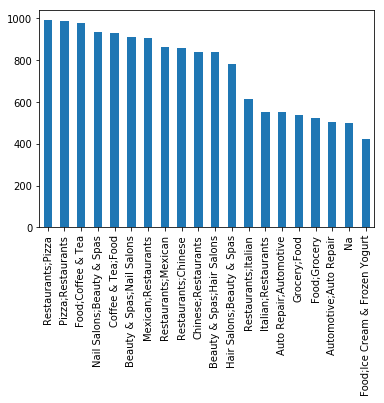

In [8]:
categories_series.value_counts().head(20).plot(kind='bar')
# Pandas Index.value_counts() function returns object containing counts of unique values. 
# The resulting object will be in 
# descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default

In [9]:
business_df['city-state']=business_df['city']+'-'+business_df['state']

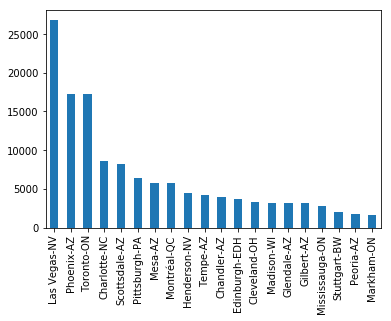

In [10]:
business_df['city-state'].value_counts().head(20).plot(kind='bar')

In [11]:
business_list=[x for x in business_df.name.values]

In [12]:
business_list

['"Dental by Design"',
 '"Stephen Szabo Salon"',
 '"Western Motor Vehicle"',
 '"Sports Authority"',
 '"Brick House Tavern + Tap"',
 '"Messina"',
 '"BDJ Realty"',
 '"Soccer Zone"',
 '"Any Given Sundae"',
 '"Detailing Gone Mobile"',
 '"East Coast Coffee"',
 '"CubeSmart Self Storage"',
 '"T & T Bakery and Cafe"',
 '"Complete Dental Care"',
 '"Showmars Government Center"',
 '"Alize Catering"',
 '"T & Y Nail Spa"',
 '"Meineke Car Care Center"',
 '"Senior\'s Barber Shop"',
 '"Maxim Bakery & Restaurant"',
 '"Starbucks"',
 '"Fye"',
 '"TSA Checkpoint T-4 A - Phoenix Sky Harbor International Airport"',
 '"GoodLife Fitness"',
 '"Sportster\'s"',
 '"Chula Taberna Mexicana"',
 '"Alfredo\'s Jewelry"',
 '"DAVIDsTEA"',
 '"Panera Bread"',
 '"Toast Cafe"',
 '"Sunnyside Grill"',
 '"Good Brakes Automotive"',
 '"Le Bistro Balmoral"',
 '"Bampot House of Tea & Board Games"',
 '"Bubbly Nails"',
 '"Brewster\'s Pub"',
 '"Kool Pool Care & Repair"',
 '"Pampered Hair Passionate about Hair"',
 '"By Design"',
 '"Ciao

In [13]:
new_list2=[]
for item in business_list:
    split_item2=item.split(';')
    new_list2+=split_item2
new_list2  


['"Dental by Design"',
 '"Stephen Szabo Salon"',
 '"Western Motor Vehicle"',
 '"Sports Authority"',
 '"Brick House Tavern + Tap"',
 '"Messina"',
 '"BDJ Realty"',
 '"Soccer Zone"',
 '"Any Given Sundae"',
 '"Detailing Gone Mobile"',
 '"East Coast Coffee"',
 '"CubeSmart Self Storage"',
 '"T & T Bakery and Cafe"',
 '"Complete Dental Care"',
 '"Showmars Government Center"',
 '"Alize Catering"',
 '"T & Y Nail Spa"',
 '"Meineke Car Care Center"',
 '"Senior\'s Barber Shop"',
 '"Maxim Bakery & Restaurant"',
 '"Starbucks"',
 '"Fye"',
 '"TSA Checkpoint T-4 A - Phoenix Sky Harbor International Airport"',
 '"GoodLife Fitness"',
 '"Sportster\'s"',
 '"Chula Taberna Mexicana"',
 '"Alfredo\'s Jewelry"',
 '"DAVIDsTEA"',
 '"Panera Bread"',
 '"Toast Cafe"',
 '"Sunnyside Grill"',
 '"Good Brakes Automotive"',
 '"Le Bistro Balmoral"',
 '"Bampot House of Tea & Board Games"',
 '"Bubbly Nails"',
 '"Brewster\'s Pub"',
 '"Kool Pool Care & Repair"',
 '"Pampered Hair Passionate about Hair"',
 '"By Design"',
 '"Ciao

In [14]:
city_list=[x for x in business_df.city.values]

In [15]:
city_list

['Ahwatukee',
 'McMurray',
 'Phoenix',
 'Tempe',
 'Cuyahoga Falls',
 'Stuttgart',
 'Las Vegas',
 'Las Vegas',
 'Wexford',
 'Henderson',
 'Houston',
 'Chandler',
 'Markham',
 'Homestead',
 'Charlotte',
 'Toronto',
 'Peoria',
 'Sun Prairie',
 'Goodyear',
 'Richmond Hill',
 'Toronto',
 'Mesa',
 'Phoenix',
 'Mississauga',
 'Toronto',
 'Toronto',
 'Las Vegas',
 'Toronto',
 'Elyria',
 'Fort Mill',
 'Toronto',
 'Phoenix',
 'Montreal',
 'Toronto',
 'Fort Mill',
 'Munroe Falls',
 'Phoenix',
 'Henderson',
 'Pineville',
 'Scottsdale',
 'Lakewood',
 'Las Vegas',
 'Davidson',
 'Cave Creek',
 'Frazer',
 'Phoenix',
 'Phoenix',
 'Madison',
 'Las Vegas',
 'Las Vegas',
 'Montréal',
 'Homestead',
 'Las Vegas',
 'Las Vegas',
 'Las Vegas',
 'Montreal',
 'Charlotte',
 'Markham',
 'Toronto',
 'Las Vegas',
 'Las Vegas',
 'Las Vegas',
 'Cuyahoga Falls',
 'Urbana',
 'Pittsburgh',
 'Toronto',
 'Surprise',
 'Cornelius',
 'Edinburgh',
 'Chesterland',
 'Urbana',
 'Phoenix',
 'Phoenix',
 'Phoenix',
 'Madison',
 'Pit

In [16]:
city_series=pd.Series(city_list)

In [17]:
most_cities=city_series.value_counts().head(20)

In [18]:
most_cities

Las Vegas      26775
Phoenix        17213
Toronto        17206
Charlotte       8553
Scottsdale      8228
Pittsburgh      6355
Mesa            5760
Montréal        5709
Henderson       4465
Tempe           4263
Chandler        3994
Edinburgh       3868
Cleveland       3322
Madison         3213
Glendale        3206
Gilbert         3128
Mississauga     2726
Stuttgart       2000
Peoria          1706
Markham         1564
dtype: int64

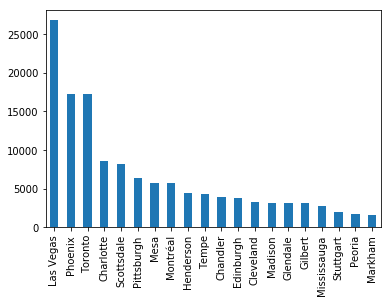

In [19]:
most_cities.plot(kind='bar')

Select 1 city of your choice, then:¶ (I select popular city by business(Las Vegas)

In [20]:
business_df.ix[3] 
# index 3 cities list(not popular city)

business_id               8DShNS-LuFqpEWIp0HxijA
name                          "Sports Authority"
neighborhood                                 NaN
address         "5000 Arizona Mills Cr, Ste 435"
city                                       Tempe
state                                         AZ
postal_code                                85282
latitude                                 33.3831
longitude                               -111.965
stars                                          3
review_count                                   9
is_open                                        0
categories               Sporting Goods;Shopping
city-state                              Tempe-AZ
Name: 3, dtype: object

In [21]:
LasVegas=city_series.value_counts().head(1)

In [22]:
LasVegas

Las Vegas    26775
dtype: int64

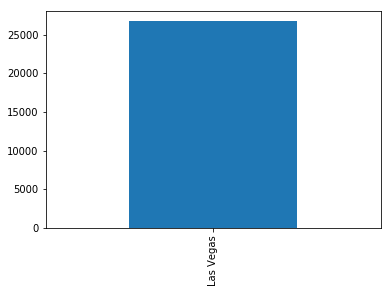

In [23]:
LasVegas.plot(kind='bar')

filter out all business in that city

In [24]:
businessinLasVegas=business_df[business_df['city']=='Las Vegas']['name']

In [25]:
businessinLasVegas

6                                              "BDJ Realty"
7                                             "Soccer Zone"
26                                      "Alfredo's Jewelry"
41                                          "Task Electric"
48                                           "Star Nursery"
49                                           "Rock of Ages"
52                                "Flight Deck Bar & Grill"
53                                                 "Subway"
54                                              "GameWorks"
59                                  "Kool Radiator Service"
60                             "John Armond Actor's Studio"
61                                               "Cinnabon"
82                                         "Tenors of Rock"
83                                       "Starlight Tattoo"
91                                         "Cafe Mastrioni"
108                                "Winchell's Donut House"
110                       "A Professiona

In [26]:
business_df['neighborhood'].fillna('{}',inplace=True)

In [27]:
df_filtered = business_df.query("city=='Las Vegas'")


In [28]:
df_filtered

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,city-state
6,kCoE3jvEtg6UVz5SOD3GVw,"""BDJ Realty""",Summerlin,"""2620 Regatta Dr, Ste 102""",Las Vegas,NV,89128,36.207430,-115.268460,4.0,5,1,Real Estate Services;Real Estate;Home Services...,Las Vegas-NV
7,OD2hnuuTJI9uotcKycxg1A,"""Soccer Zone""",{},"""7240 W Lake Mead Blvd, Ste 4""",Las Vegas,NV,89128,36.197484,-115.249660,1.5,9,1,Shopping;Sporting Goods,Las Vegas-NV
26,VBHEsoXQb2AQ76J9l8h1uQ,"""Alfredo's Jewelry""",Southeast,"""5775 S Eastern, Ste 103""",Las Vegas,NV,89119,36.085051,-115.119421,4.5,23,1,Shopping;Jewelry;Watch Repair;Local Services,Las Vegas-NV
41,1Jp_hmPNUZArNqzpbm7B0g,"""Task Electric""",Spring Valley,"""7260 Cimarron Rd, Ste 130""",Las Vegas,NV,89113,36.056382,-115.269332,4.5,20,1,Home Services;Lighting Fixtures & Equipment;Lo...,Las Vegas-NV
48,DPQnTnNw2PJj7DdENM98Cw,"""Star Nursery""",{},"""5340 Boulder Hwy""",Las Vegas,NV,89122,36.105196,-115.056880,3.5,25,1,Nurseries & Gardening;Home & Garden;Shopping,Las Vegas-NV
49,_F3AMoo_zdl-he384ISQbw,"""Rock of Ages""",{},"""3700 W Flamingo Rd""",Las Vegas,NV,89109,36.116965,-115.185696,4.0,213,1,Arts & Entertainment;Performing Arts,Las Vegas-NV
52,Pd52CjgyEU3Rb8co6QfTPw,"""Flight Deck Bar & Grill""",Southeast,"""6730 S Las Vegas Blvd""",Las Vegas,NV,89119,36.066914,-115.170848,4.0,13,1,Nightlife;Bars;Barbeque;Sports Bars;American (...,Las Vegas-NV
53,4srfPk1s8nlm1YusyDUbjg,"""Subway""",Southeast,"""6889 S Eastern Ave, Ste 101""",Las Vegas,NV,89119,36.064652,-115.118954,2.5,6,1,Fast Food;Restaurants;Sandwiches,Las Vegas-NV
54,n7V4cD-KqqE3OXk0irJTyA,"""GameWorks""",Southeast,"""6587 Las Vegas Blvd S, Ste 171""",Las Vegas,NV,89119,36.068259,-115.178877,3.0,349,1,Arcades;Arts & Entertainment;Gastropubs;Restau...,Las Vegas-NV
59,Sx0C2RsDgrG3RxBBUoBqTw,"""Kool Radiator Service""",Westside,"""3228 Meade Ave""",Las Vegas,NV,89102,36.136639,-115.184585,3.5,9,1,Automotive;Auto Repair,Las Vegas-NV


find the 5 most popular business categories.

In [29]:
Lasvegasbusiness=[x for x in business_df.name.values]

In [30]:
Lasvegasbusiness

['"Dental by Design"',
 '"Stephen Szabo Salon"',
 '"Western Motor Vehicle"',
 '"Sports Authority"',
 '"Brick House Tavern + Tap"',
 '"Messina"',
 '"BDJ Realty"',
 '"Soccer Zone"',
 '"Any Given Sundae"',
 '"Detailing Gone Mobile"',
 '"East Coast Coffee"',
 '"CubeSmart Self Storage"',
 '"T & T Bakery and Cafe"',
 '"Complete Dental Care"',
 '"Showmars Government Center"',
 '"Alize Catering"',
 '"T & Y Nail Spa"',
 '"Meineke Car Care Center"',
 '"Senior\'s Barber Shop"',
 '"Maxim Bakery & Restaurant"',
 '"Starbucks"',
 '"Fye"',
 '"TSA Checkpoint T-4 A - Phoenix Sky Harbor International Airport"',
 '"GoodLife Fitness"',
 '"Sportster\'s"',
 '"Chula Taberna Mexicana"',
 '"Alfredo\'s Jewelry"',
 '"DAVIDsTEA"',
 '"Panera Bread"',
 '"Toast Cafe"',
 '"Sunnyside Grill"',
 '"Good Brakes Automotive"',
 '"Le Bistro Balmoral"',
 '"Bampot House of Tea & Board Games"',
 '"Bubbly Nails"',
 '"Brewster\'s Pub"',
 '"Kool Pool Care & Repair"',
 '"Pampered Hair Passionate about Hair"',
 '"By Design"',
 '"Ciao

In [31]:
Lasvegas_series=pd.Series(Lasvegasbusiness)

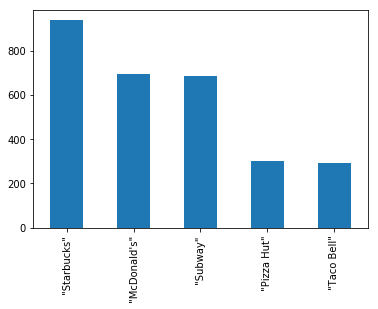

In [32]:
most_popular_inLasVegas=Lasvegas_series.value_counts().head(5).plot(kind='bar')


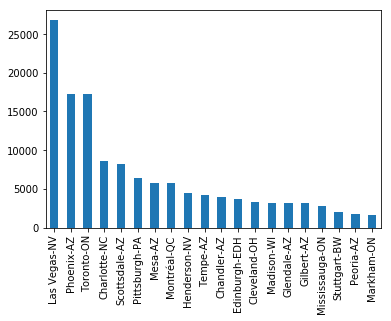

In [33]:
business_df['city-state'].value_counts().head(20).plot(kind='bar')


Similar for Toronto

In [34]:
toronto_df = business_df[business_df['city-state']=='Toronto-ON']

In [35]:
toronto_df

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,city-state
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants,Toronto-ON
20,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",Liberty Village,"""85 Hanna Avenue""",Toronto,ON,M6K 3S3,43.639863,-79.419533,4.0,21,1,Food;Coffee & Tea,Toronto-ON
24,VSGcuYDV3q-AAZ9ZPq4fBQ,"""Sportster's""",The Danforth,"""1430 Danforth Avenue""",Toronto,ON,M4J 1N4,43.682867,-79.326964,2.5,7,1,Bars;Sports Bars;Nightlife,Toronto-ON
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars,Toronto-ON
27,AtdXq_gu9NTE5rx4ct_dGg,"""DAVIDsTEA""",Ryerson,"""10 Dundas Street E""",Toronto,ON,M5B 2G9,43.656729,-79.380718,4.0,6,1,Coffee & Tea;Food;Tea Rooms,Toronto-ON
30,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",{},"""2777 Steeles Avenue W""",Toronto,ON,M3J 3K5,43.781816,-79.490433,5.0,3,1,Restaurants;Breakfast & Brunch,Toronto-ON
33,FXHfcFVEfI1vVngW2gVOpw,"""Bampot House of Tea & Board Games""",{},"""201 Harbord Street""",Toronto,ON,M5S 1H6,43.661582,-79.408878,4.0,55,1,Coffee & Tea;Restaurants;Food;Mediterranean;Te...,Toronto-ON
58,PEKloTo1IkW_gyxp15e8Dg,"""Amy's Lash & Beauty Spa""",Summer Hill,"""1219 Yonge Street""",Toronto,ON,M4T 1W4,43.683213,-79.391942,3.5,7,1,Eyelash Service;Beauty & Spas,Toronto-ON
65,LL01hTt_eVdp-ws4zMDsrw,"""Pil Son""",Financial District,"""Toronto-Dominion Centre Bank Tower, 66 Wellin...",Toronto,ON,M5K 1H1,43.646954,-79.382159,5.0,3,1,Health & Medical;General Dentistry;Dentists,Toronto-ON
86,VXH7zXcZzXlmAVN8GSjGRQ,"""Thai Express""",{},"""4700 Keele Street""",Toronto,ON,M3J 1P3,43.774878,-79.494619,3.0,5,1,Imported Food;Specialty Food;Thai;Ethnic Food;...,Toronto-ON


In [36]:
toronto_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,city-state
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants,Toronto-ON
20,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",Liberty Village,"""85 Hanna Avenue""",Toronto,ON,M6K 3S3,43.639863,-79.419533,4.0,21,1,Food;Coffee & Tea,Toronto-ON
24,VSGcuYDV3q-AAZ9ZPq4fBQ,"""Sportster's""",The Danforth,"""1430 Danforth Avenue""",Toronto,ON,M4J 1N4,43.682867,-79.326964,2.5,7,1,Bars;Sports Bars;Nightlife,Toronto-ON
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars,Toronto-ON
27,AtdXq_gu9NTE5rx4ct_dGg,"""DAVIDsTEA""",Ryerson,"""10 Dundas Street E""",Toronto,ON,M5B 2G9,43.656729,-79.380718,4.0,6,1,Coffee & Tea;Food;Tea Rooms,Toronto-ON


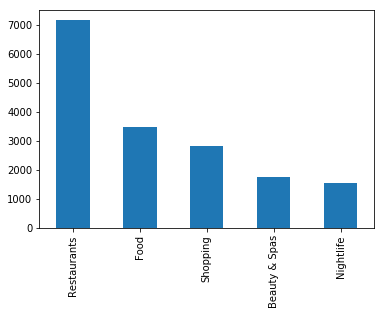

In [37]:
toronto_list = [val for sublist in toronto_df.categories.values for val in sublist.split(';')]
toronto_series = pd.Series(toronto_list)
toronto_series.value_counts().head(5).plot(kind='bar')

In [40]:
toronto_top = toronto_series.value_counts().head(5).i
toronto_top

Index(['Restaurants', 'Food', 'Shopping', 'Beauty & Spas', 'Nightlife'], dtype='object')

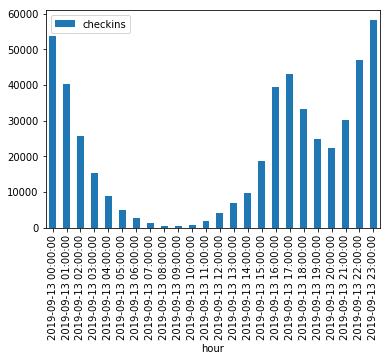

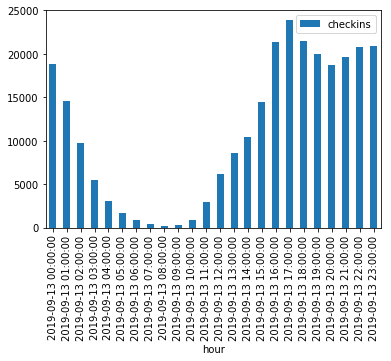

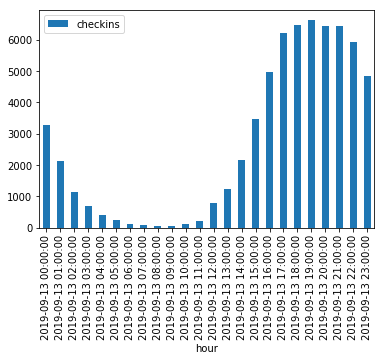

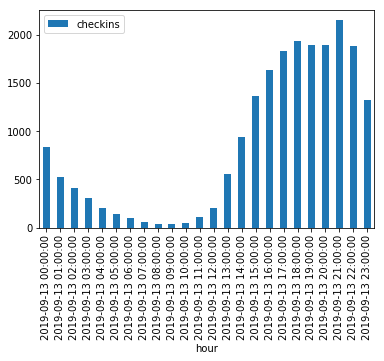

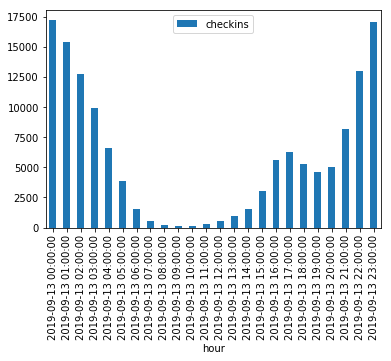

In [42]:
for i in toronto_top:
    bus_df = toronto_df[toronto_df['categories'].str.contains(i)]
    check_bus_df = checkin_df[checkin_df['business_id'].isin(list(bus_df['business_id']))]
    check_bus_df.groupby(['hour']).sum().plot(kind='bar')

plots top 5 businesses in city and their check-in frequency tables

In [46]:
def top_bus(city_state):
    citystate_df = business_df[business_df['city-state']==city_state]
    bus_list = [val for sublist in citystate_df.categories.values for val in sublist.split(';')]
    bustop = bus_series.value_counts().head(5).index
    bus_series.value_counts().head(5).plot(kind='bar')
    for i in bustop:
        bus_df = citystate_df[citystate_df['categories'].str.contains(i)]
        checkbus_df = checkin_df[checkin_df['business_id'].isin(list(bus_df['business_id']))]
        checkbus_df.groupby(['hour']).sum().plot(kind='bar')